# AIR QUALITY INDEX (AQI) in Delhi

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [24]:
ls

 Volume in drive D is New Volume
 Volume Serial Number is BC3B-6CC3

 Directory of D:\ShadowFox

29-03-2025  21:07    <DIR>          .
29-03-2025  21:07    <DIR>          ..
22-03-2025  20:12    <DIR>          .ipynb_checkpoints
25-03-2025  21:14            40,158 delhiaqi.csv
29-03-2025  20:39           808,006 Task_1.ipynb
29-03-2025  21:07           253,258 Task_2.ipynb
               3 File(s)      1,101,422 bytes
               3 Dir(s)  306,755,981,312 bytes free


In [25]:
# Load AQI dataset for Delhi
df = pd.read_csv("delhiaqi.csv")

In [26]:
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [27]:
df.info() #basic information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB


In [28]:
#Summary of statistics in dataset
#df.describe()
display(df.describe().T) #changing rows into columns

,count,mean,std,min,25%,50%,75%,max
co,561.0,3814.942210,3227.744681,654.22,1708.98,2590.18,4432.68,16876.22
no,561.0,51.181979,83.904476,0.00,3.38,13.30,59.01,425.58
no2,561.0,75.292496,42.473791,13.37,44.55,63.75,97.33,263.21
o3,561.0,30.141943,39.979405,0.00,0.07,11.80,47.21,164.51
so2,561.0,64.655936,61.073080,5.25,28.13,47.21,77.25,511.17
pm2_5,561.0,358.256364,227.359117,60.10,204.45,301.17,416.65,1310.20
pm10,561.0,420.988414,271.287026,69.08,240.90,340.90,482.57,1499.27
nh3,561.0,26.425062,36.563094,0.63,8.23,14.82,26.35,267.51


In [29]:
# Checking for missing values
df.isnull().sum()

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

In [30]:
df.columns

Index(['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'], dtype='object')

## Research Questions:
### 1. What are the key pollutants affecting Delhi's AQI?
### 2. How does AQI vary seasonally?
### 3. What geographical factors influence air quality in different parts of Delhi?

## Visualization

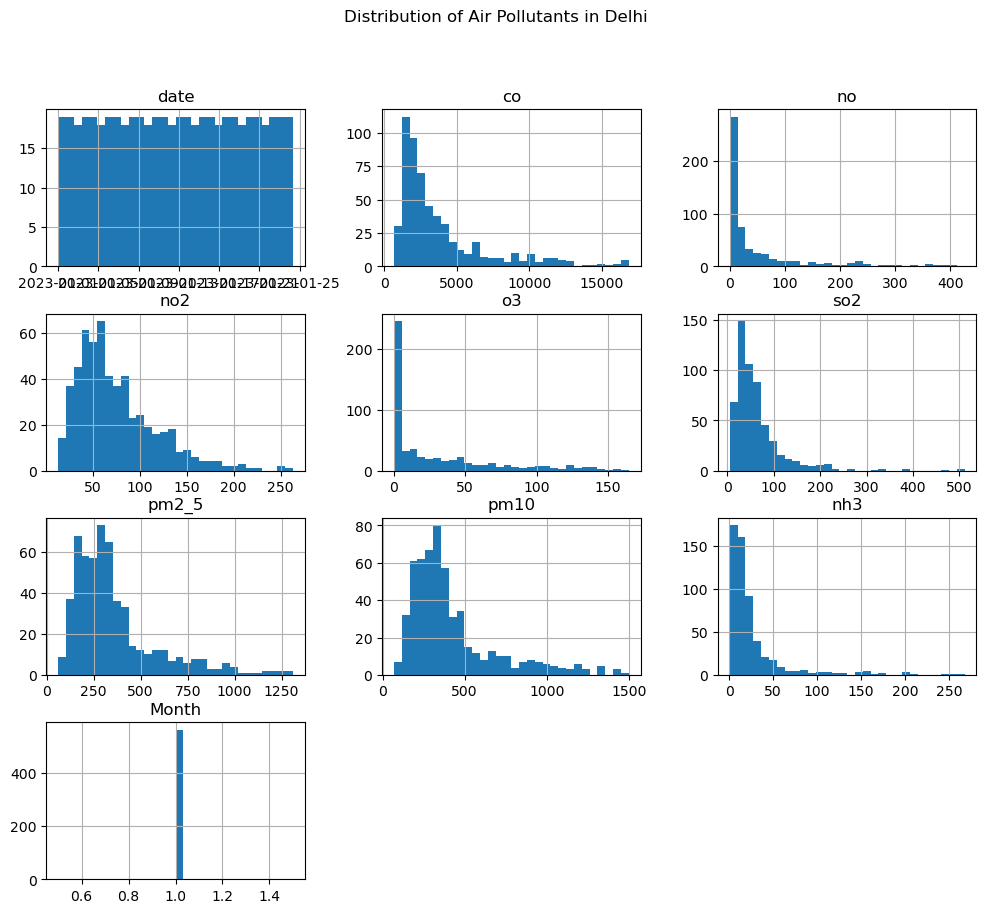

In [49]:
# Histogram of AQI-related pollutants
df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Distribution of Air Pollutants in Delhi")
plt.show()

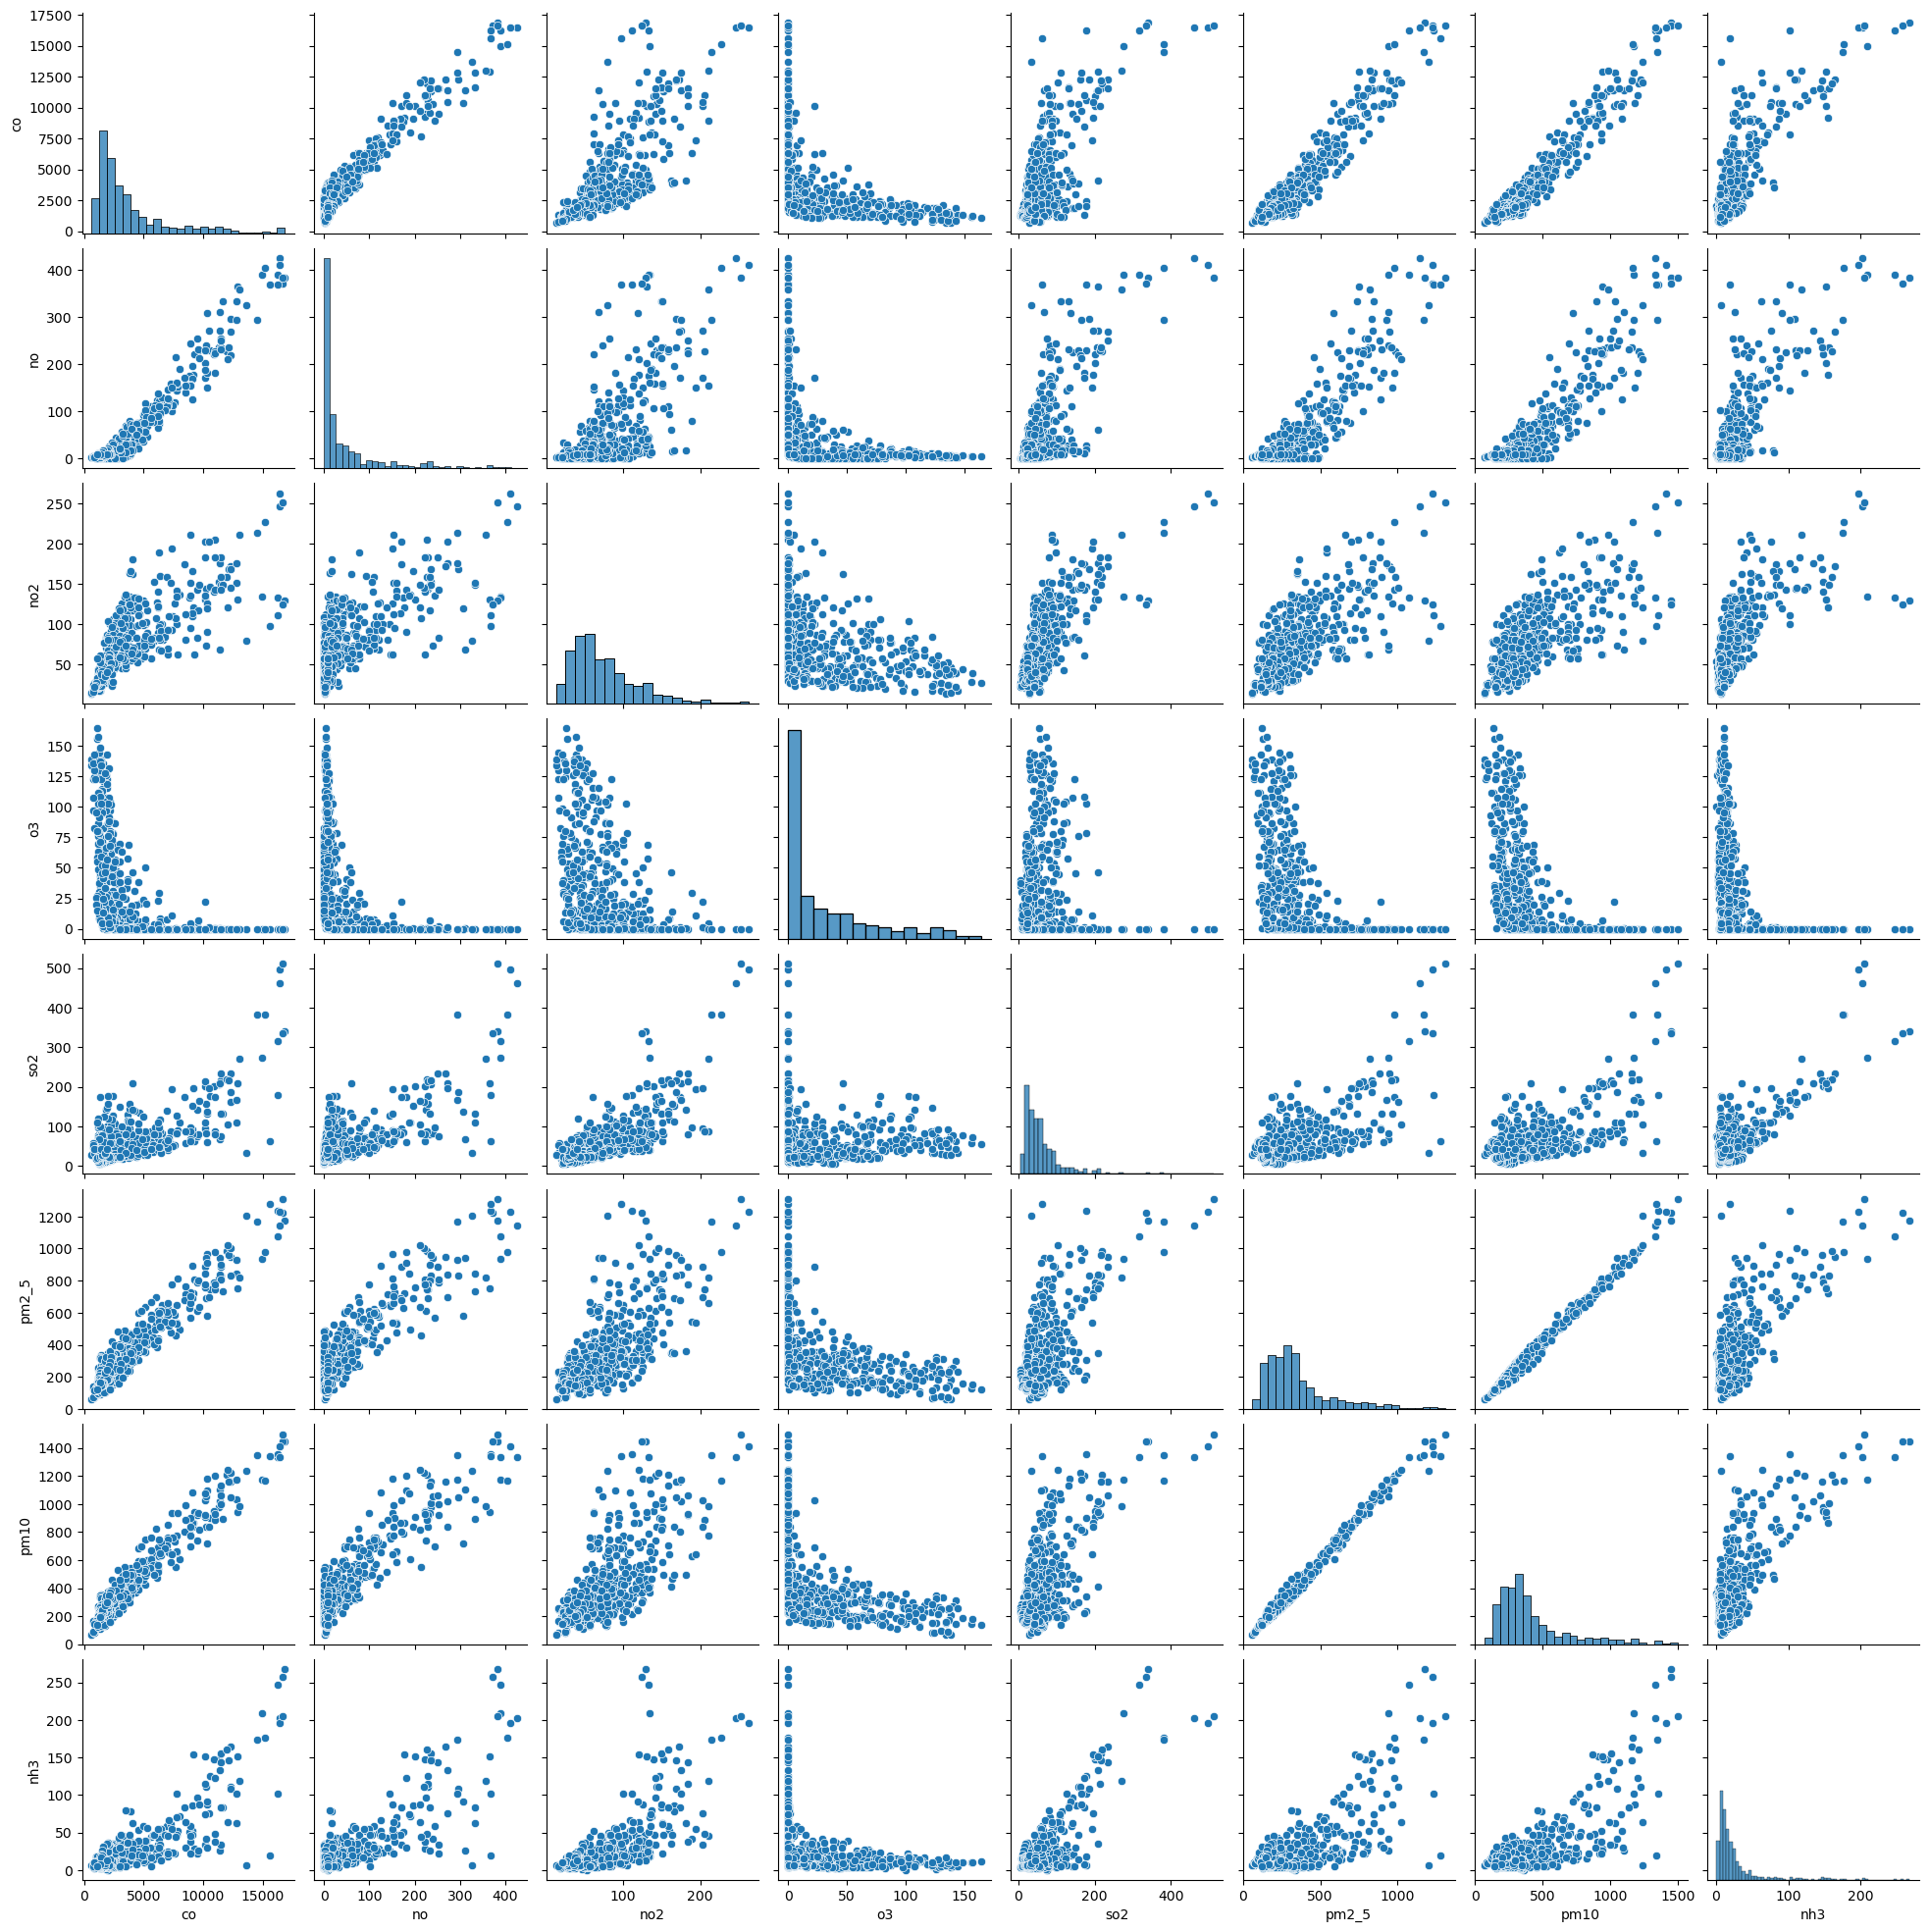

In [54]:
# Pairplot to explore relationships between pollutants
sns.pairplot(df[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']])
plt.show()

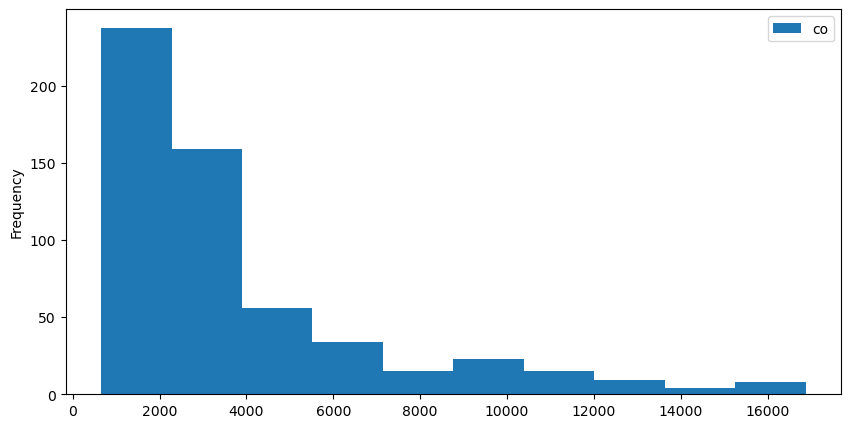

In [31]:
# Univariate analytics
df['co'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

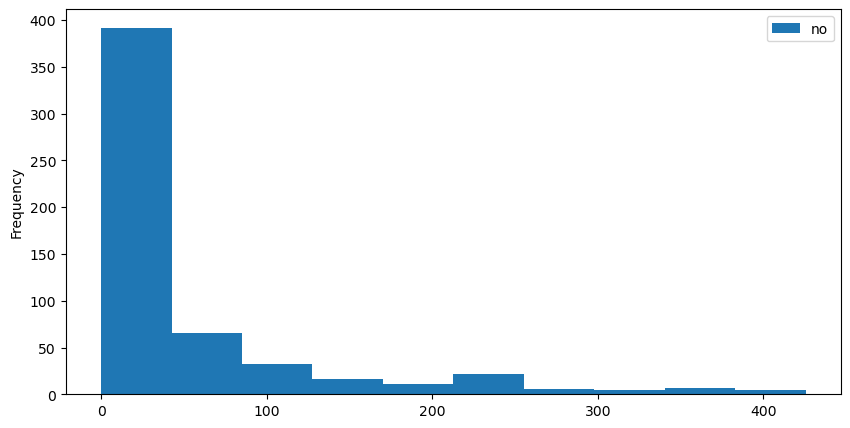

In [32]:
df['no'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

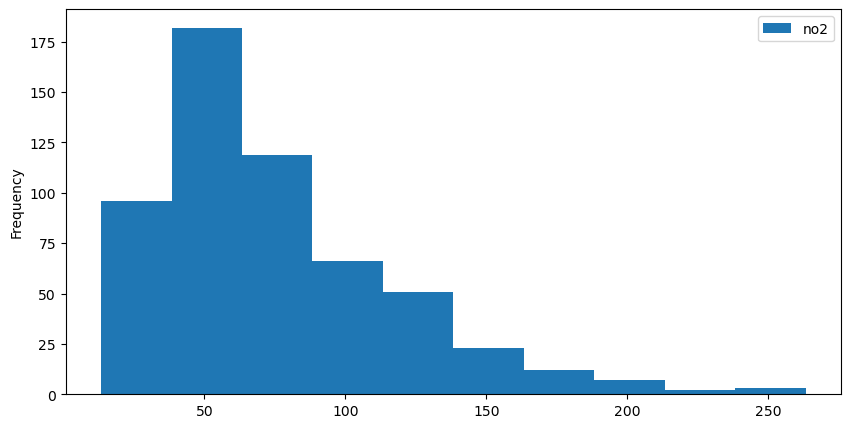

In [33]:
df['no2'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

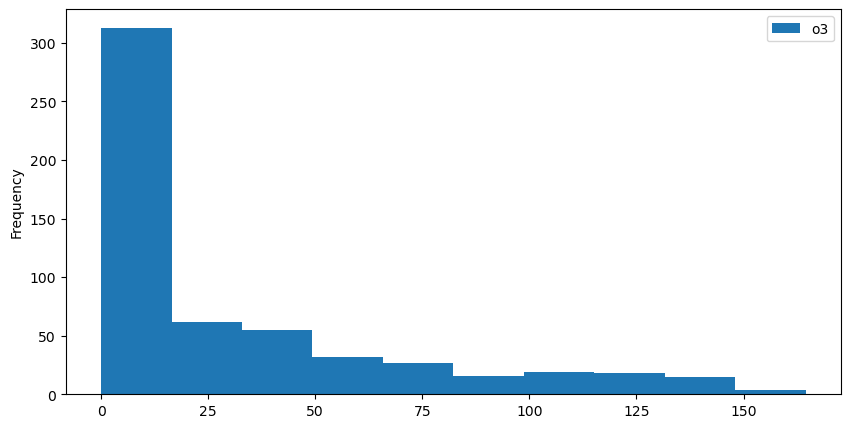

In [34]:
df['o3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

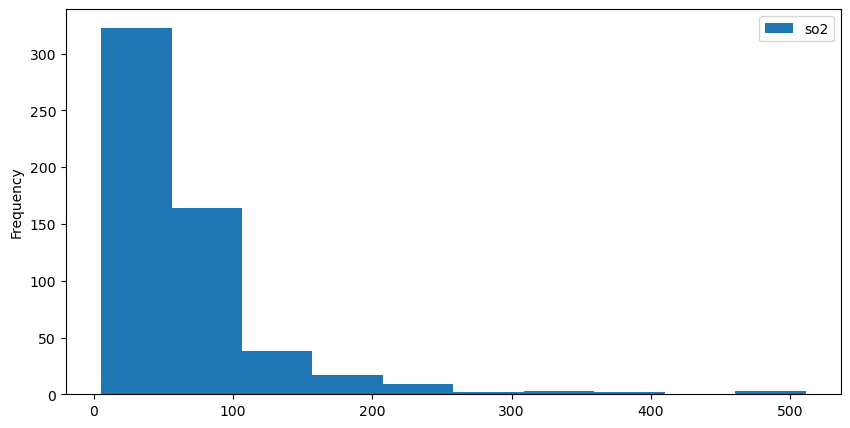

In [35]:
df['so2'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

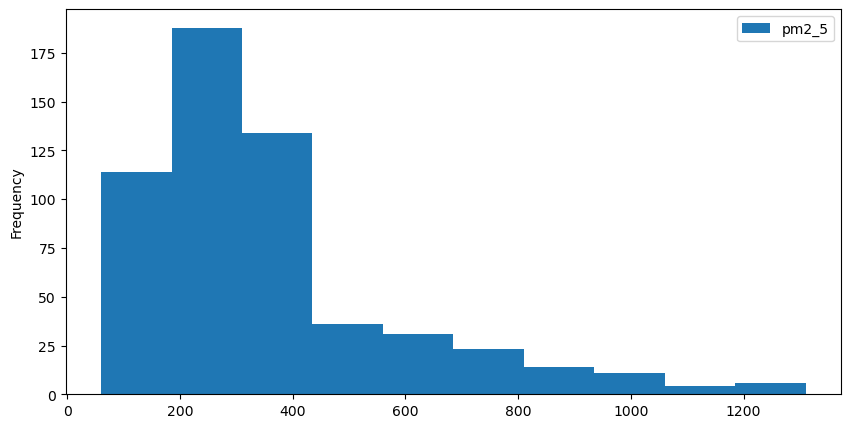

In [36]:
df['pm2_5'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

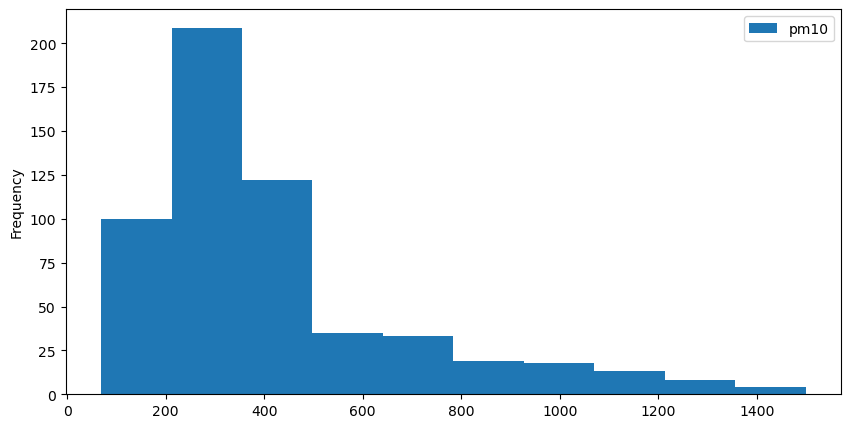

In [37]:
df['pm10'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

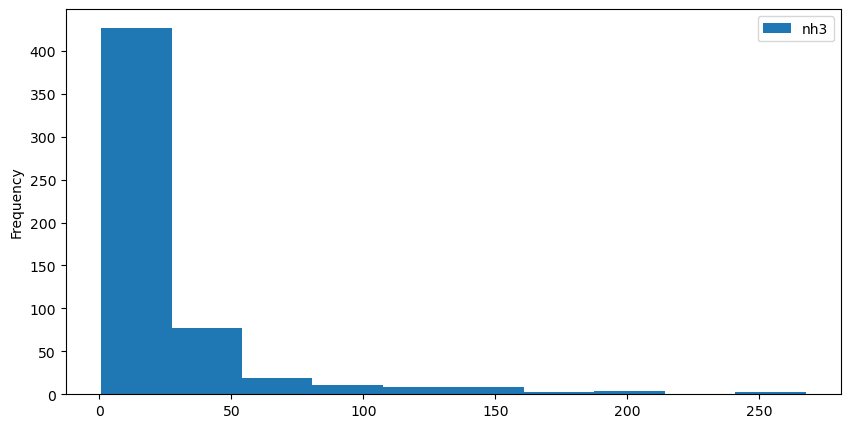

In [38]:
df['nh3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

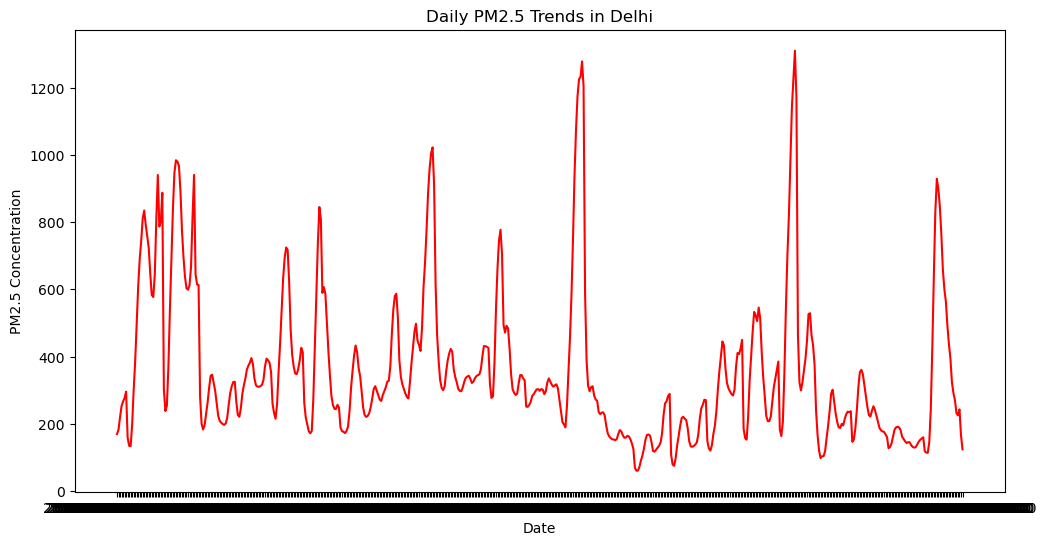

In [39]:
# Time-series visualization of AQI trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='pm2_5', data=df, color='red')
plt.title("Daily PM2.5 Trends in Delhi")
plt.xlabel("Date")
plt.ylabel("PM2.5 Concentration")
plt.show()


In [41]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

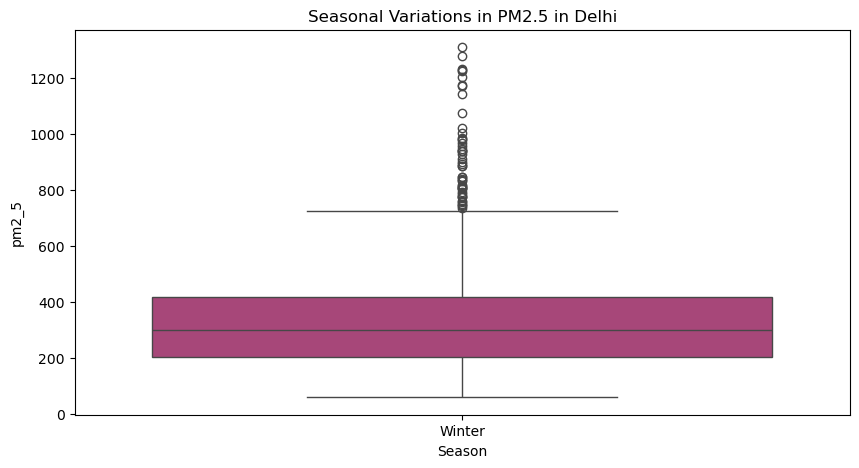

In [47]:
# Seasonal variation in AQI
df['Month'] = df['date'].dt.month
df['Season'] = df['Month'].map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                                 3: 'Spring', 4: 'Spring', 5: 'Spring',
                                 6: 'Summer', 7: 'Summer', 8: 'Summer',
                                 9: 'Monsoon', 10: 'Monsoon', 11: 'Autumn'})
plt.figure(figsize=(10, 5))
sns.boxplot(x='Season', y='pm2_5',hue='Season', data=df, palette='magma')
plt.title("Seasonal Variations in PM2.5 in Delhi")
plt.show()

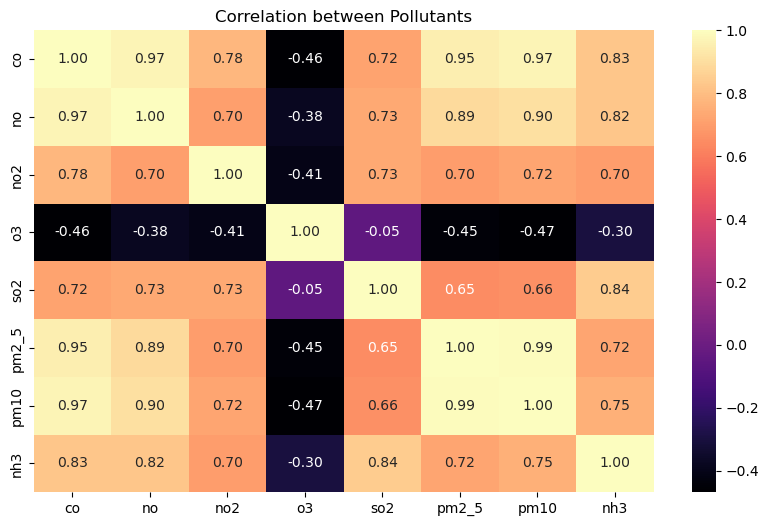

In [43]:
# Key pollutants correlation
df_pollutants = df[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']]
correlation = df_pollutants.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='magma', fmt='.2f')
plt.title("Correlation between Pollutants")
plt.show()